###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import missingno as msno
from sklearn.preprocessing import StandardScaler, MinMaxScaler, binarize

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
import warnings as ws
ws.filterwarnings('ignore')

###Importing Dataset

In [ ]:
data = pd.read_csv("https://www.dropbox.com/s/5sirw6tdflbo31b/BankNoteAuthentication.csv?dl=1")
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
 def summary(data):
    df = {
     'Count' : data.shape[0],
     'NA values' : data.isna().sum(),
     '% NA' : round((data.isna().sum()/data.shape[0]) * 100, 2),
     'Unique' : data.nunique(),
     'Dtype' : data.dtypes,
     'min' : round(data.min(),2),
     '25%' : round(data.quantile(.25),2),
     '50%' : round(data.quantile(.50),2),
     'mean' : round(data.mean(),2),
     '75%' : round(data.quantile(.75),2),   
     'max' : round(data.max(),2)
    } 
    return(pd.DataFrame(df))

print('Shape is :', data.shape)
summary(data)

Shape is : (1372, 5)


,Count,NA values,% NA,Unique,Dtype,min,25%,50%,mean,75%,max
variance,1372,0,0.0,1338,float64,-7.04,-1.77,0.50,0.43,2.82,6.82
skewness,1372,0,0.0,1256,float64,-13.77,-1.71,2.32,1.92,6.81,12.95
curtosis,1372,0,0.0,1270,float64,-5.29,-1.57,0.62,1.40,3.18,17.93
entropy,1372,0,0.0,1156,float64,-8.55,-2.41,-0.59,-1.19,0.39,2.45
class,1372,0,0.0,2,int64,0.00,0.00,0.00,0.44,1.00,1.00


###Visualising the using different plots

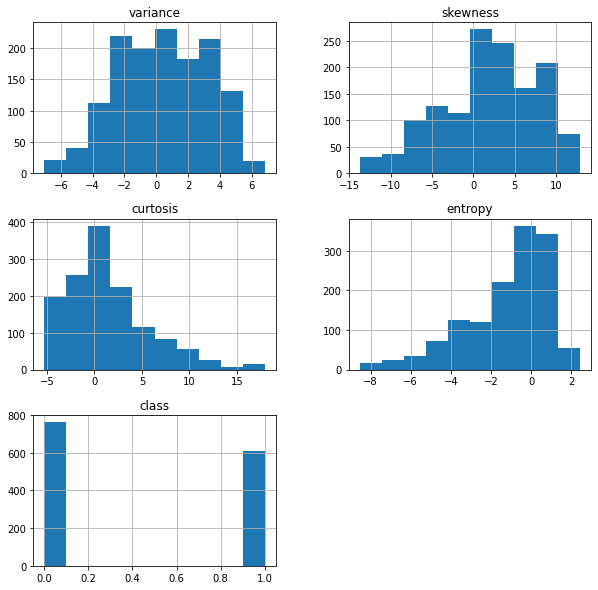

In [ ]:
data.hist(figsize = (10,10))
plt.show()

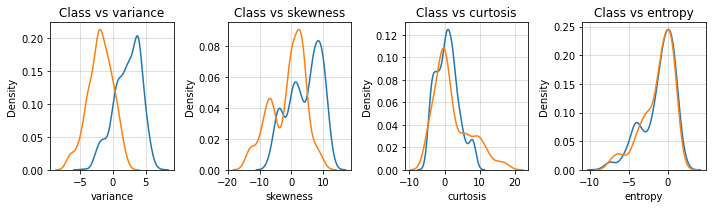

In [ ]:
col_names = data.drop('class', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in col_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(data[col][data['class'] ==0], label = 'Fake note')
    sns.kdeplot(data[col][data['class'] ==1], label = 'Original note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()

###Splitting the data 

In [ ]:
X = data.drop('class', axis = 1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state = 7)

###Appending different models

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))

###Function for model selection

In [ ]:
def model_selection(x_train, y_train):
    acc_result = []
    auc_result = []
    names = []

    col = ['Model', 'ROC AUC Mean','ROC AUC Std','ACC Mean', 'ACC Std']
    result = pd.DataFrame(columns = col)

    i=0
    for name, model in models:
        kfold = KFold(n_splits = 10, shuffle =True, random_state = 7)
        cv_acc_result  = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
        cv_auc_result  = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'roc_auc')

        acc_result.append(cv_acc_result)
        auc_result.append(cv_auc_result)
        names.append(name)

        result.loc[i] = [name, 
                         cv_auc_result.mean(), 
                         cv_auc_result.std(),
                         cv_acc_result.mean(),
                         cv_acc_result.std()]

        result = result.sort_values('ROC AUC Mean', ascending = False)
        i+= 1

 

    return(result)

In [ ]:
model_selection(x_train, y_train)

,Model,ROC AUC Mean,ROC AUC Std,ACC Mean,ACC Std
3,KNN,1.000000,0.000000,1.000000,0.000000
4,SVM,1.000000,0.000000,0.994792,0.006988
5,RF,0.999870,0.000278,0.990625,0.009827
0,LR,0.999780,0.000293,0.991667,0.006250
1,LDA,0.999694,0.000340,0.976042,0.010469
7,GB,0.999463,0.001228,0.991667,0.007795
6,ADA,0.998131,0.003500,0.994792,0.006988
2,CART,0.980326,0.008732,0.980208,0.009827


on observing above cell we find that KNN is the best algorithm

###Function for model validation

In [ ]:
def model_validation(model,x_test,y_test,thr = 0.5) :
    
    y_pred_prob = model.predict_proba(x_test)[:,1]
    y_pred = binarize( y_pred_prob.reshape(1,-1))[0]
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (10,3))
    plt.subplot(1,2,1)
    sns.heatmap(cnf_matrix, annot = True, fmt = 'g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    plt.subplot(1,2,2)
    sns.lineplot(fpr, tpr)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    
    print('Classification Report :')
    print('===' * 20)
    print(classification_report(y_test, y_pred))

    score = tpr - fpr
    opt_threshold = sorted(zip(score,threshold))[-1][1]
    print('='*20)
    print('Area Under Curve', roc_auc_score(y_test,y_pred))
    print('Accuracy', accuracy_score(y_test,y_pred))
    print('Optimal Threshold : ',opt_threshold)
    print('='*20)

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [ ]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [ ]:
final_model = grid.best_estimator_

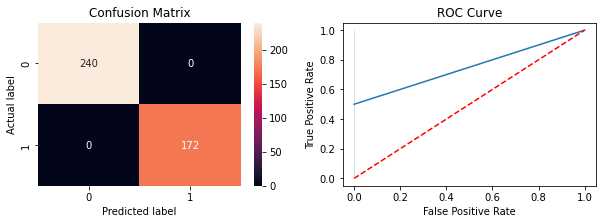

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       172

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Area Under Curve 1.0
Accuracy 1.0
Optimal Threshold :  1.0


In [ ]:
model_validation(final_model, x_test, y_test)

###Conclusion:-
We analyze the dataset for BankNote Authenticationand visualize the data using different plots and applied different ML algorithms for BankNote Authentication and found out tha KNN is the best algo for the given problem with Accuracy = 1.0